### 데이터셋 전처리 1단계 : Data 속성 정리 및 각 bearingN_n 의 csv파일 merge 하기

(완료)

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import pywt
import os
import tqdm 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
def fix_file(df):
    df = pd.Series(df[df.columns[0]])
    #데이터 형식이 안맞는 경우 
    fixed = pd.DataFrame()
    fixed['H'] = df.str.split(';').str[0]
    fixed['M'] = df.str.split(';').str[1]
    fixed['S'] = df.str.split(';').str[2]
    fixed['MS'] = df.str.split(';').str[3]
    fixed['Horiz'] = df.str.split(';').str[4]
    fixed['Vert'] = df.str.split(';').str[5]
    return fixed


def read_data(path):
    file_list = os.listdir(path)
    file_list.sort() #헐,,,,
    total_list = []
    for i in range(len(file_list)):
        tem = pd.read_csv(path+file_list[i], header = None)
        if len(tem.columns) == 6:
            tem.columns = ['H','M','S','MS','Horiz','Vert']
            
            total_list.append(tem)
            
        if len(tem.columns) == 1:
            tem2 = fix_file(tem)
            tem2.columns = ['H','M','S','MS','Horiz','Vert']
            total_list.append(tem2)
            
        else:
            continue
            #tem.columns = ['H','M','S','MS','Horiz','Vert']
        #usecols =['hour','min','second','0.x','Horiz','Vert']
        
    merged_data = pd.concat([i for i in total_list],axis = 0)

    return merged_data 

#### Learning_set merged_data

In [10]:
## Target PATH
path = "/home/dpe/workspace/sohyang/PM/M-thesis/DATA/phm-ieee-2012-data-challenge-dataset/Learning_set/"
files = os.listdir(path)
files.sort()
files

['Bearing1_1',
 'Bearing1_2',
 'Bearing2_1',
 'Bearing2_2',
 'Bearing3_1',
 'Bearing3_2']

In [11]:
!pwd

/home/dpe/workspace/sohyang/PM/M-thesis/preprocessing


In [12]:
for get_file in files:
    path2 = path+get_file+"/"
    tem = read_data(path2)
    tem.to_csv('../DATA/merged_data/Learning_set/'+ get_file+".csv",index= False)

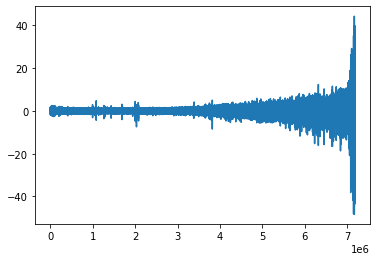

In [13]:
bearing1_1 = pd.read_csv("../DATA/merged_data/Learning_set/Bearing1_1.csv")
hori = bearing1_1['Horiz']
plt.plot(hori)

#### Full_Test_set merged_data


In [14]:
## Target PATH
path = "/home/dpe/workspace/sohyang/PM/M-thesis/DATA/phm-ieee-2012-data-challenge-dataset/Full_Test_Set/"
files = os.listdir(path)
files.sort()
files

['Bearing1_3',
 'Bearing1_4',
 'Bearing1_5',
 'Bearing1_6',
 'Bearing1_7',
 'Bearing2_3',
 'Bearing2_4',
 'Bearing2_5',
 'Bearing2_6',
 'Bearing2_7',
 'Bearing3_3']

In [15]:
"""
column에 NaN값이나 여러 type의 데이터가 섞여 있으면 아래와 같은 경고가 발생한다.
이 때 경고 메시지가 알려주는 대로 dtype option으로 타입을 명시해주거나 low_memory = False로 지정해 주면 경고 메시지가 출력되지 않는다.
pd.read_csv('[파일명].txt', delimiter = '\t', low_memory=False)
"""
for get_file in files:
    path2 = path+get_file+"/"
    
    tem = read_data(path2)
    tem.to_csv('../DATA/merged_data/Full_Test_set/'+ get_file+".csv",index= False) 

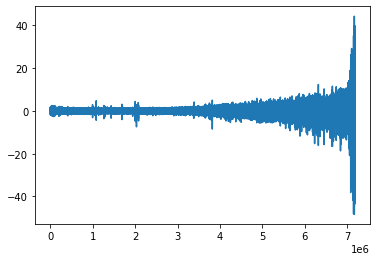

In [17]:
bearing1_3 = pd.read_csv("../DATA/merged_data/Full_Test_set/Bearing1_3.csv")
hori = bearing1_1['Horiz']
plt.plot(hori)

### Test_set merged

In [18]:
## Target PATH
path = "/home/dpe/workspace/sohyang/PM/M-thesis/DATA/phm-ieee-2012-data-challenge-dataset/Test_set/"
files = os.listdir(path)
files.sort()
files

['Bearing1_3',
 'Bearing1_4',
 'Bearing1_5',
 'Bearing1_6',
 'Bearing1_7',
 'Bearing2_3',
 'Bearing2_4',
 'Bearing2_5',
 'Bearing2_6',
 'Bearing2_7',
 'Bearing3_3']

In [19]:
for get_file in files:
    path2 = path+get_file+"/"
    
    tem = read_data(path2)
    tem.to_csv('../DATA/merged_data/Test_set/'+ get_file+".csv",index= False) 

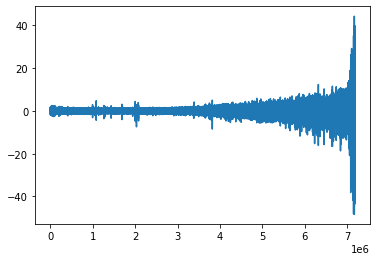

In [21]:
bearing1_3 = pd.read_csv("../DATA/merged_data/Test_set/Bearing1_3.csv")
hori = bearing1_1['Horiz']
plt.plot(hori)

### Labeling

In [22]:
# make label
# 0.1 초에 2560개 샘플 (10초 간격) -> 즉 10초에 2560 1분: 15360
Path = "../DATA/merged_data/Full_Test_set"
bearing_list = os.listdir(Path)
bearing_list.sort()

Y = pd.DataFrame(np.array([5730,339,1610,1460,7570,7530,1390,3090,1290,580,820])*256).T
Y.columns  = bearing_list
Y.to_csv("../DATA/labeling/RUL.csv",index=False)
Y_RUL = Y
Y_RUL

,Bearing1_3.csv,Bearing1_4.csv,Bearing1_5.csv,Bearing1_6.csv,Bearing1_7.csv,Bearing2_3.csv,Bearing2_4.csv,Bearing2_5.csv,Bearing2_6.csv,Bearing2_7.csv,Bearing3_3.csv
0,1466880,86784,412160,373760,1937920,1927680,355840,791040,330240,148480,209920


In [23]:
Path = "../DATA/merged_data/Full_Test_set"
bearing_list = os.listdir(Path)
bearing_list.sort()

full_len = []
for name in bearing_list:
    data = pd.read_csv(Path + "/"+name)
    #print(nul)
    #print(nul2)
    full_len.append(len(data))

full_len = pd.DataFrame(full_len).T
full_len.columns  = bearing_list
name = "full_len.csv"
full_len.to_csv("/home/dpe/workspace/sohyang/PM/M-thesis/DATA/labeling/"+name ,index=False)
full_len

,Bearing1_3.csv,Bearing1_4.csv,Bearing1_5.csv,Bearing1_6.csv,Bearing1_7.csv,Bearing2_3.csv,Bearing2_4.csv,Bearing2_5.csv,Bearing2_6.csv,Bearing2_7.csv,Bearing3_3.csv
0,6080000,3797307,6550997,6511142,6008257,5004800,1997007,6147167,1864037,611137,1153757


In [24]:
#TEST LEN
Path2 = "../DATA/merged_data/Test_set"
bearing_list = os.listdir(Path2)
bearing_list.sort()

test_len = []
for name in bearing_list:
    data = pd.read_csv(Path2 + "/"+name)
    #print(nul)
    #print(nul2)
    test_len.append(len(data))


test_len = pd.DataFrame(test_len).T
test_len.columns  = bearing_list
name = "test_len.csv"
test_len.to_csv("/home/dpe/workspace/sohyang/PM/M-thesis/DATA/labeling/"+name,index=False)
test_len

,Bearing1_3.csv,Bearing1_4.csv,Bearing1_5.csv,Bearing1_6.csv,Bearing1_7.csv,Bearing2_3.csv,Bearing2_4.csv,Bearing2_5.csv,Bearing2_6.csv,Bearing2_7.csv,Bearing3_3.csv
0,4613120,2915840,6122737,6122707,3994637,3077120,1627267,5325227,1464320,456857,935627


In [25]:
# HOriOVER 20 이 나오는 경우

Path = "../DATA/merged_data/Full_Test_set"
bearing_list = os.listdir(Path)
bearing_list.sort()

over_len = []
for name in bearing_list:
    data = pd.read_csv(Path + "/"+name)
    
    
    idx = data[(data['Horiz']>20)].index[0]
    #    
    #nul = data[data['Horiz'].isnull()]
    #nul2 = data[data['Horiz'].isnull()]
    


    #print(nul)
    #print(nul2)
    over_len.append(idx)

# OVER 20
over = pd.DataFrame(over_len).T
over.columns  = bearing_list
name = "over.csv"
over.to_csv("/home/dpe/workspace/sohyang/PM/M-thesis/DATA/labeling/"+name,index=False)
over

,Bearing1_3.csv,Bearing1_4.csv,Bearing1_5.csv,Bearing1_6.csv,Bearing1_7.csv,Bearing2_3.csv,Bearing2_4.csv,Bearing2_5.csv,Bearing2_6.csv,Bearing2_7.csv,Bearing3_3.csv
0,5952219,2942820,6305280,6266880,5710542,4981761,1922560,5916160,1794560,579418,1111040


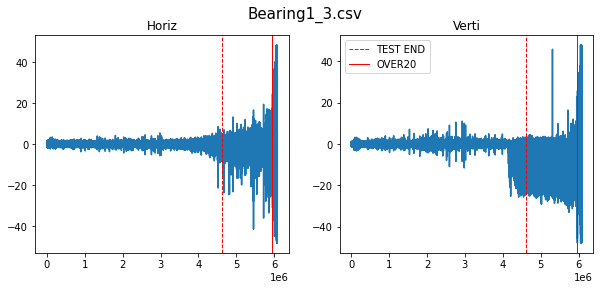

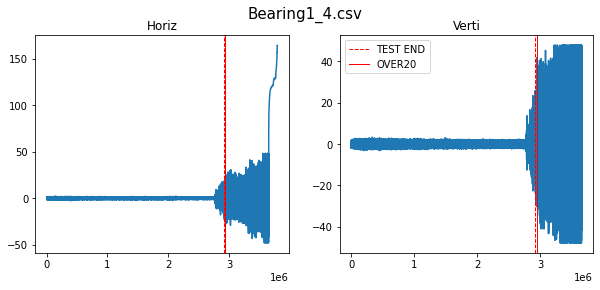

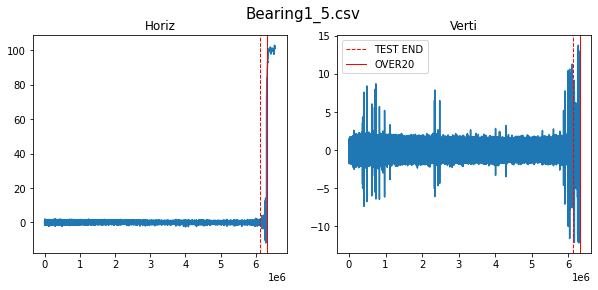

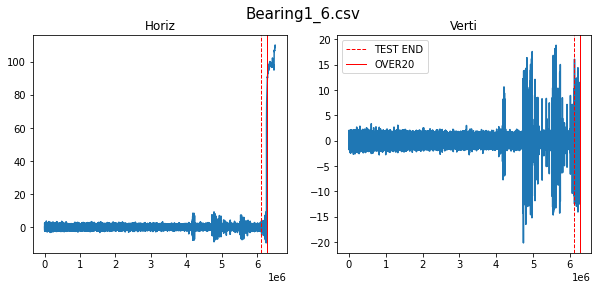

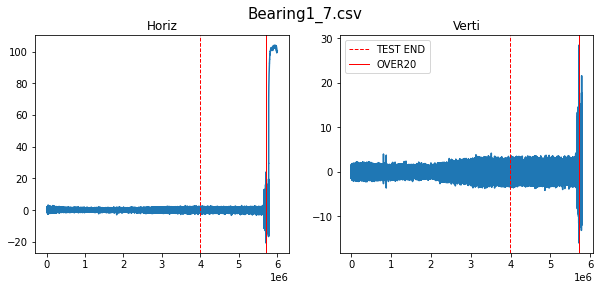

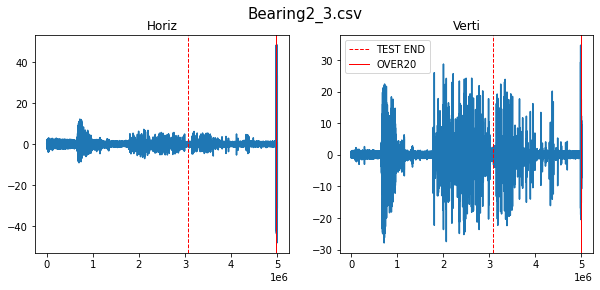

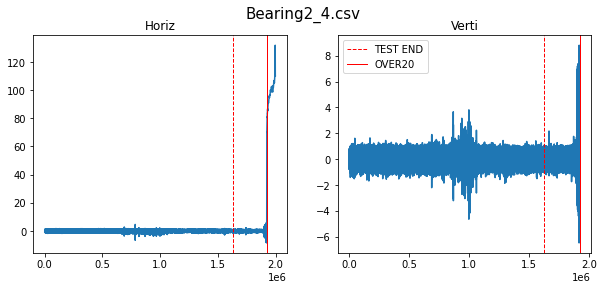

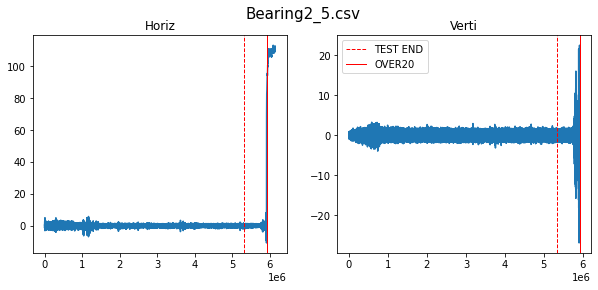

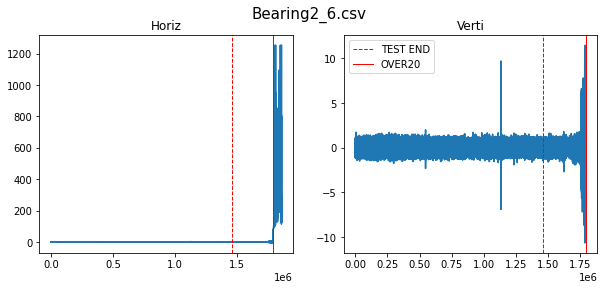

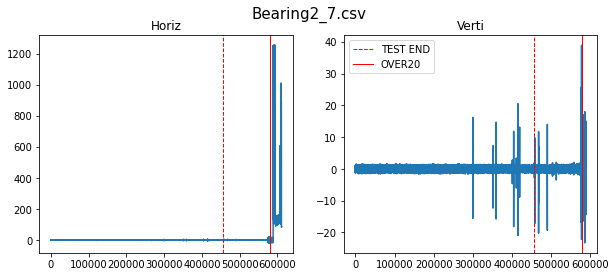

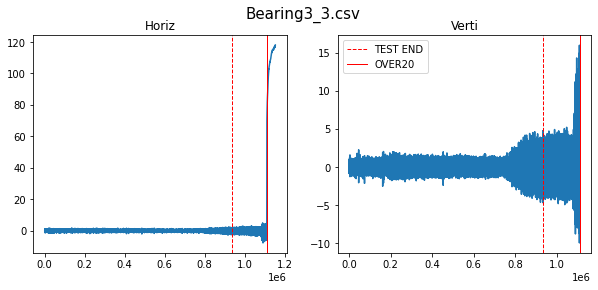

In [28]:
Path = "../DATA/merged_data/Full_Test_set"
bearing_list = os.listdir(Path)
bearing_list.sort()

for name in bearing_list:
    data = pd.read_csv(Path + "/"+name)
    hori = data['Horiz']
    verti = data['Vert']
    
    fig, ax = plt.subplots(1, 2)
    plt.rcParams["figure.figsize"] = (10,4)
    
    ax[0].plot(hori)
    ax[1].plot(verti)

    ax[0].set_title("Horiz")
    ax[1].set_title("Verti")
    
    label = test_len[name]
    over_line  = over[name]
            
    ax[0].axvline(x=label[0], color='r', linestyle='--',label='TEST END', linewidth=1)
    ax[1].axvline(x=label[0], color='r', linestyle='--',label='TEST END', linewidth=1)
    
    ax[0].axvline(x=over_line[0], color='r',label='OVER20', linewidth=1)
    ax[1].axvline(x=over_line[0], color='r',label='OVER20', linewidth=1)

    
    plt.suptitle(name,fontsize=15)
    plt.savefig("../DATA/labeling/"+'plot/'+name[:-4] +'.png')
    plt.legend()
    plt.show()

### label.csv

In [29]:
def mklabel(len_normal, len_abnormal,data_frame=True):
    list = []
    for normal in range(len_normal):
        list.append(0)
    for abnormal in range(len_abnormal):
        list.append(1)

    if data_frame :
        filename = pd.DataFrame(list, columns=['label'])
        filename.to_csv("./test_label.csv", index=False)
    return list

In [30]:
# make raw dataset test_label
len_normal = 4613120
len_abnormal = 1466880
label_list = mklabel(len_normal, len_abnormal,data_frame=True)

In [31]:
pd.read_csv("/home/dpe/workspace/sohyang/PM/M-thesis/DATA/merged_data/test_label.csv")

,label
0,0
1,0
2,0
3,0
4,0
...,...
6079995,1
6079996,1
6079997,1
6079998,1


In [ ]:
# make top5 dataset test_label
len_normal = 1802
len_abnormal = 573
label_list = mklabel(len_normal, len_abnormal,data_frame=True)